In [ ]:
import pandas as pd

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [ ]:
orders_qu= orders_cl.copy()
orderlines_qu= orderlines_cl.copy()
products_qu= products_cl.copy()

#1. Define Pandas format

In [ ]:
pd.get_option('display.max_rows')

60

In [ ]:
pd.get_option('display.max_rows', 1000) #We can custom-set the number of rows displayed within the DF

60

In [ ]:
pd.describe_option('display.float_format')

display.float_format : callable
    The callable should accept a floating point number and return
    a string with the desired format of the number. This is used
    in some places like SeriesFormatter.
    See formats.format.EngFormatter for an example.
    [default: None] [currently: None]


In [ ]:
'%.2f' % 2.9995 #To set the display of a float value

'3.00'

#2. Excluding unwanted orders
We are dealing with only those orders having 'completed' state hence we will get rid of all the other orders

In [ ]:
orders_qu.head(10)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
7,245851,2017-04-04 20:58:21,79.99,Pending
8,245941,2017-01-01 10:32:23,183.52,Completed
9,246018,2017-02-13 23:02:57,211.95,Completed


In [ ]:
orders_qu.state.value_counts()

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: count, dtype: int64

In [ ]:
orders_qu.shape

(226904, 4)

We want to check the unique orders present currently in orders and orderlines respectively

In [ ]:
orders_qu.order_id.nunique()

226904

In [ ]:
orderlines_qu.id_order.nunique()

170213

The difference is pretty huge

In [ ]:
orders_qu_new= orders_qu.loc[(orders_qu['state']=='Completed'), :] #Keeping only those records with completed state
orders_qu_new

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [ ]:
orders_qu_new.shape[0]

46605

Using inner join, keeping only those records common in orderlines and orders DFs
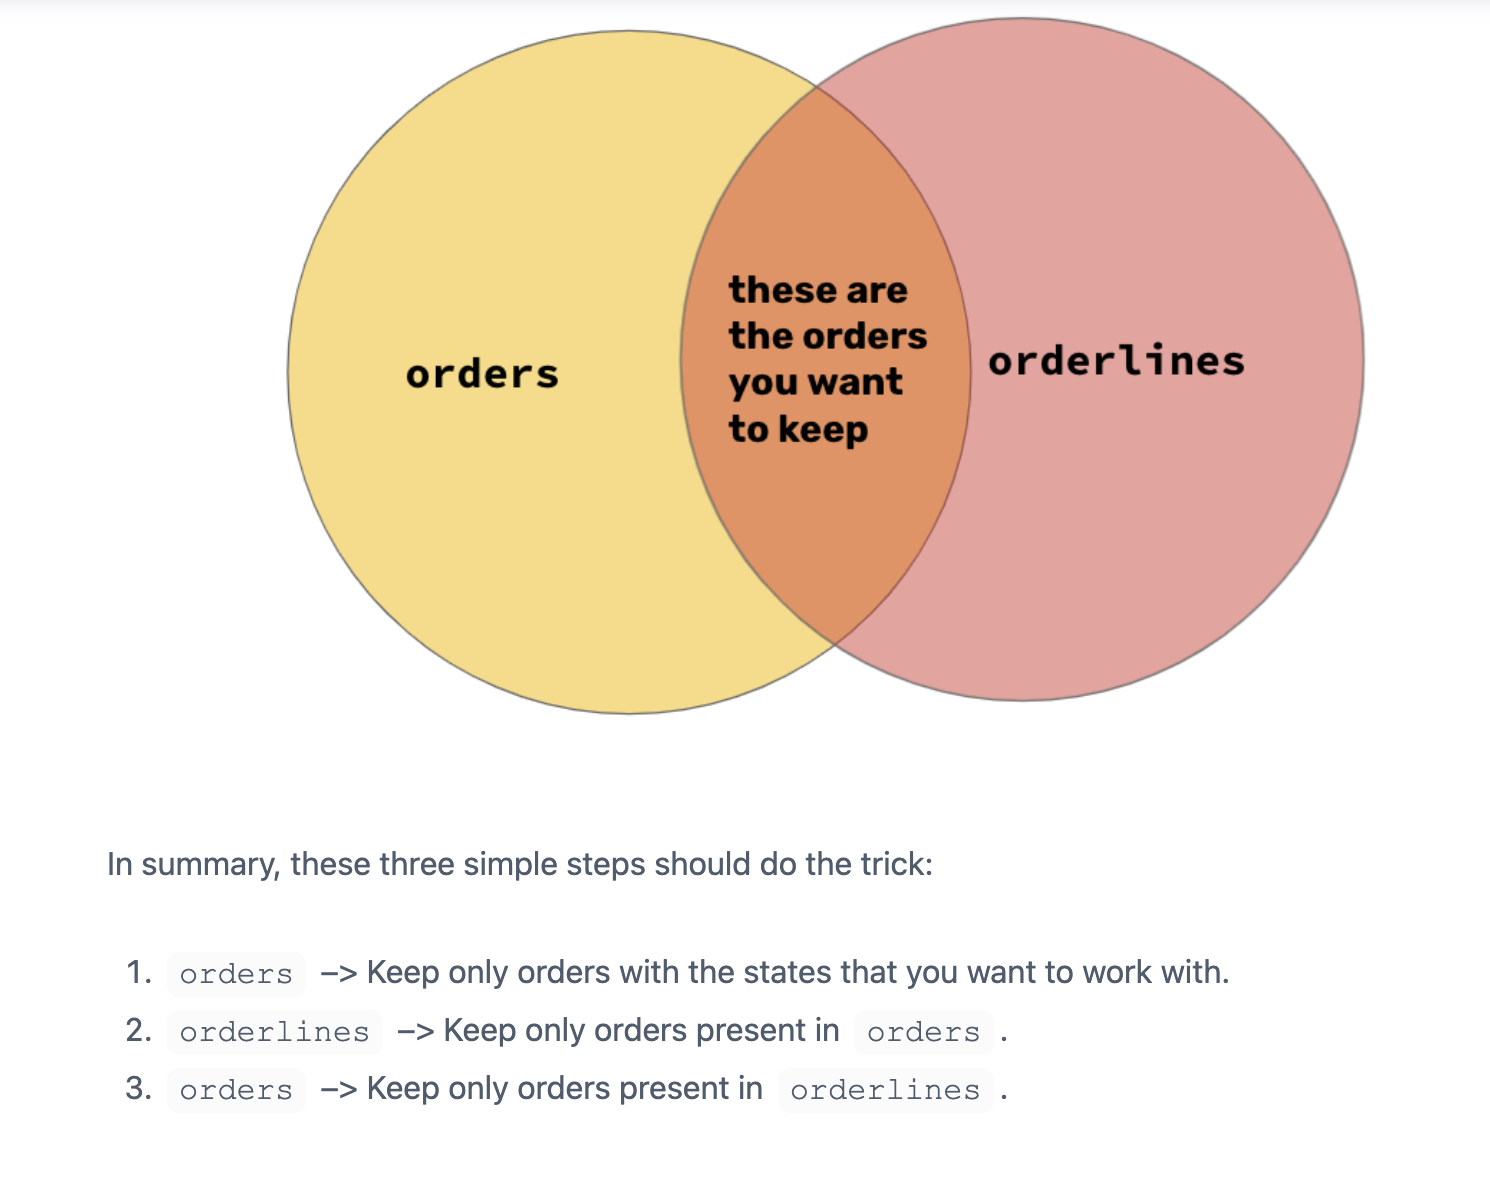

In [ ]:
orders_orderlines= orders_qu_new.merge(orderlines_cl, left_on = 'order_id', right_on= 'id_order', how='inner')
orders_orderlines

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00
...,...,...,...,...,...,...,...,...,...,...,...
56709,527042,2018-03-14 11:47:50,18.98,Completed,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38
56710,527070,2018-03-14 11:50:48,24.97,Completed,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
56711,527074,2018-03-14 11:51:42,24.97,Completed,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
56712,527096,2018-03-14 11:58:40,34.96,Completed,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [ ]:
order_ids= orders_orderlines['order_id'].unique() #Order ids that are in both tables
len(order_ids)

43064

In [ ]:
orders_qu= orders_qu.loc[orders_qu['order_id'].isin(order_ids),:] #keep those ids in orders_qu

orderlines_qu= orderlines_qu.loc[orderlines_qu['id_order'].isin(order_ids),:] #keep those ids in ordelines_qu

In [ ]:
orders_qu['order_id'].nunique(), orderlines_qu['id_order'].nunique() #We get the exact equal records

(43064, 43064)

#3. Exclude orders with unknown products

During data-cleaning, some of the records from the products table were dropped. Thus it is imp. to have the matching records between orderlines and products.

With a left-join, we can display all orderlines and if sku has been sold in orderlines but does not have an entry in products then the product name will be empty (which needs to be eliminated)

In [ ]:
orderlines_products= orderlines_qu.merge(products_qu, on='sku', how='left')[['id_order', 'sku', 'name']]
orderlines_products

,id_order,sku,name
0,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...
1,299546,IOT0014,iOttie Easy View 2 Car Black Support
2,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...
3,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200
4,299561,PEB0015,Pebble Smartwatch Time Steel Black
...,...,...,...
56709,525664,TUC0207,Tucano Elements Second Skin Macbook Sleeve 12 ...
56710,527070,APP0698,Apple Lightning Cable Connector to USB 1m Whit...
56711,527074,APP0698,Apple Lightning Cable Connector to USB 1m Whit...
56712,527096,APP0698,Apple Lightning Cable Connector to USB 1m Whit...


In [ ]:
orderlines_products.name.isna().value_counts()

name
False    55320
True      1394
Name: count, dtype: int64

In [ ]:
orders_to_delete= orderlines_products.loc[orderlines_products.name.isna(),'id_order'].unique() #Gives us id_order with empty product names which will be deleted
orders_to_delete

array([299638, 299706, 299712, ..., 526106, 526122, 526363])

In [ ]:
orders_qu = orders_qu.loc[~orders_qu.order_id.isin(orders_to_delete),:] #Keeping only those orders in orders and orderlines which are not corrupted

In [ ]:
orderlines_qu = orderlines_qu.loc[~orderlines_qu.id_order.isin(orders_to_delete),:]

In [ ]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(41701, 41701)

In [ ]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41701 entries, 1 to 226614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      41701 non-null  int64  
 1   created_date  41701 non-null  object 
 2   total_paid    41701 non-null  float64
 3   state         41701 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


#4. Explore the revenue from different tables

In a consistent and coherent dataset the value of an order should roughly match the sum of all items bought on that order. Let's investigate

In [ ]:
orders_qu_copy= orders_qu.copy()

In [ ]:
orderlines_qu_copy=orderlines_qu.copy()

## Create unit total price = quantity * unit price

In [ ]:
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]

In [ ]:
orderlines_qu_copy.tail(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
215873,1649440,527035,0,1,APP0498,23.00,2018-03-14 11:41:55,23.00
215874,1649441,527034,0,1,APP0927,13.99,2018-03-14 11:42:01,13.99
215876,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,13.99
215877,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
215886,1649468,525664,0,1,TUC0336,7.93,2018-03-14 11:43:59,7.93
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97
215949,1649593,527112,0,1,APP0698,9.99,2018-03-14 11:58:13,9.99


##Group by id_order, summarising by the sum of unit_price_total

In [ ]:
orderlines_order_ids = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
# as_index=False changes the return so that the groupedby column remains a column (not the index)
orderlines_order_ids

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
41696,527042,13.99
41697,527070,19.98
41698,527074,19.98
41699,527096,29.97


##What is the average difference between total_paid and unit_price_total?

```
# This is formatted as code
```



This means calculating the difference for every order thus we need the grouped tables. We need to merge the orderlines (grouped) with the orders table

In [ ]:
diff_df= orders_qu_copy.merge(orderlines_order_ids, left_on='order_id', right_on='id_order')
diff_df

,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97


In [ ]:
diff_df['difference']=diff_df['total_paid']- diff_df['unit_price_total']
diff_df.head(10)

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
5,246405,2017-11-24 10:01:27,407.96,Completed,246405,275.75,132.21
6,247524,2018-01-09 14:21:34,167.98,Completed,247524,162.99,4.99
7,247643,2017-05-26 11:50:35,153.54,Completed,247643,153.54,0.00
8,250275,2017-11-19 22:34:54,54.99,Completed,250275,51.00,3.99
9,251302,2017-05-10 12:27:33,140.99,Completed,251302,140.99,0.00


In [ ]:
diff_df.difference.mean().round(2)

4.47

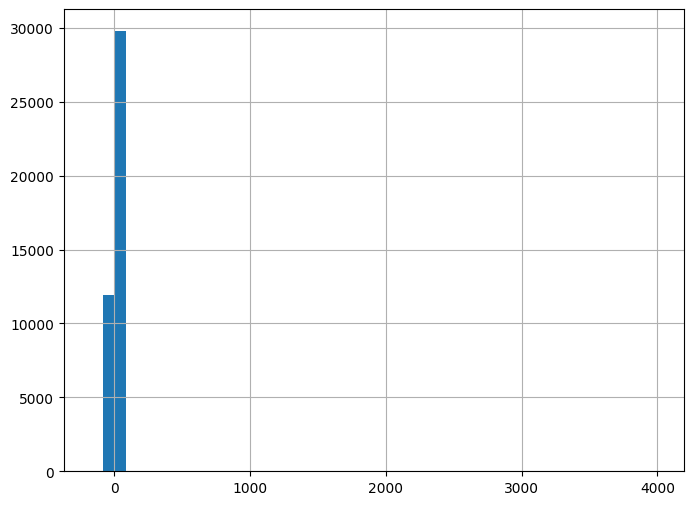

In [ ]:
diff_df.difference.hist(bins= 50, figsize=(8,6));

##What is the distribution of these differences?

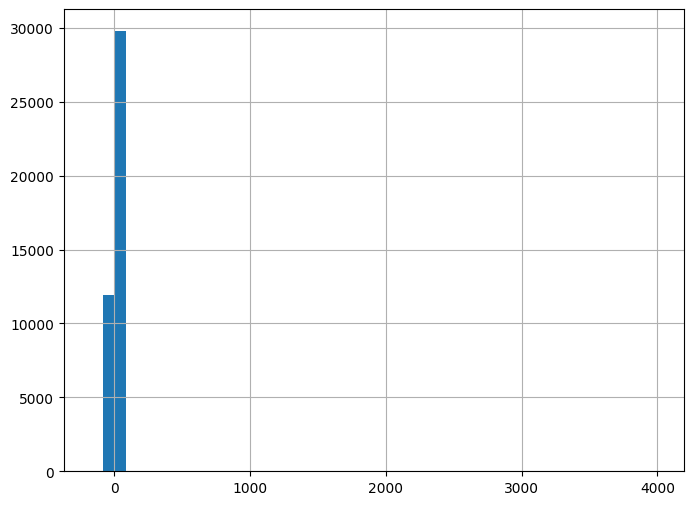

In [ ]:
diff_df.difference.hist(bins= 50, figsize=(8,6));

In [ ]:
diff_df.difference.describe()

count    41701.000000
mean         4.474808
std         26.046478
min       -165.000000
25%          0.000000
50%          4.990000
75%          6.990000
max       3984.990000
Name: difference, dtype: float64

There's a rule of thumb, that anything:

lower than the 25% quartile - (1.5 x interquartile range), or
higher than the 75% quartile + (1.5 x interquartile range)
is an outlier. Let's use this rule to try and exclude any corrupted data.

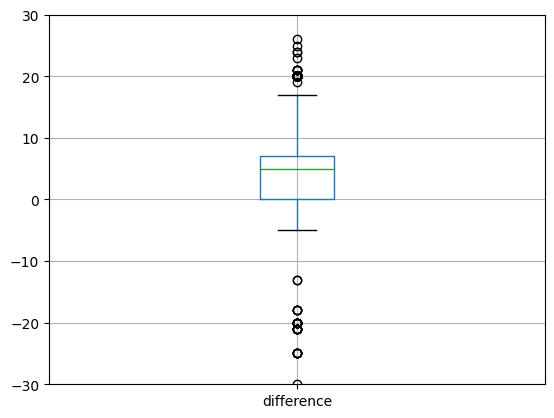

In [ ]:
import matplotlib.pyplot as plt

ax = diff_df.boxplot('difference');
ax.set_ylim(-30, +30)
plt.show()

In [ ]:
#Calculate the Quartiles
Q1= diff_df['difference'].quantile(0.25)
Q3= diff_df['difference'].quantile(0.75)

Q1, Q3

(0.0, 6.989999999999981)

In [ ]:
#Calculate the IQR
IQR= Q3-Q1
IQR

6.989999999999981

In [ ]:
#Lower limit
LL= -10.48

In [ ]:
#Upper limit
Q3+ (1.5*IQR)

17.47499999999995

In [ ]:
#Filtering to include only that data which is not an outlier
diff_no_outliers_df = diff_df.loc[
    (diff_df["difference"] >= (LL))
    &
    (diff_df["difference"] <= (Q3 + 1.5*IQR))
    ,
    :]

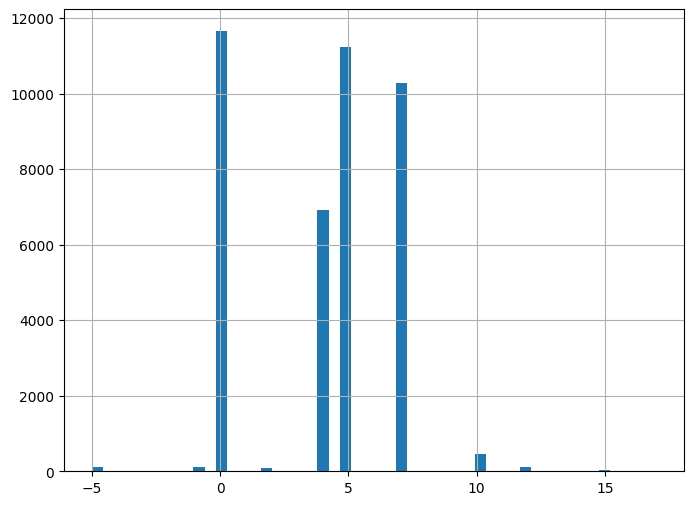

In [ ]:
diff_no_outliers_df.difference.hist(bins= 50, figsize=(8,6));

<Axes: >

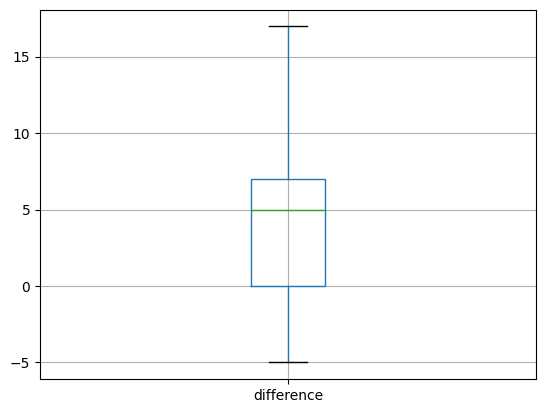

In [ ]:
diff_no_outliers_df.boxplot("difference")

In [ ]:
diff_no_outliers_df.difference.value_counts().sort_values(ascending=False).head(10)

difference
0.00    10476
6.99     4559
4.99     3419
4.99     2523
4.99     2351
6.99     1889
3.99     1882
3.99     1620
3.99     1463
6.99     1305
Name: count, dtype: int64

In [ ]:
diff_no_outliers_df.difference.astype(str).value_counts().sort_values(ascending=False).head(10)

difference
0.0                  10476
6.990000000000009     4559
4.990000000000009     3419
4.990000000000002     2523
4.989999999999995     2351
6.989999999999995     1889
3.990000000000009     1882
3.990000000000002     1620
3.989999999999995     1463
6.990000000000002     1305
Name: count, dtype: int64

This looks much more like what we would expect: a small difference, but nothing extreme.

Now we need to remove these orders with extreme differences from our orders_lines_merged DataFrame.

In [ ]:
diff_no_outliers_df.difference.describe()

count    40985.000000
mean         3.939763
std          2.834176
min         -5.000000
25%          0.000000
50%          4.990000
75%          6.990000
max         16.970000
Name: difference, dtype: float64

In [ ]:
normal_diff_list = diff_no_outliers_df["order_id"]

In [ ]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(normal_diff_list), :]

In [ ]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(40985, 40985)

In [ ]:
from google.colab import files

orders_qu.to_csv("orders_qu.csv", index=False)
files.download("orders_qu.csv")

orderlines_qu.to_csv("orderlines_qu.csv", index=False)
files.download("orderlines_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>